import requests
from bs4 import BeautifulSoup

In [2]:
# URL da vítima
url = "https://agenciabrasil.ebc.com.br/economia"

# Cabeçalho para simular um navegador
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/117.0.0.0 Safari/537.36"
}


In [3]:
response = requests.get(url, headers=headers)
response

<Response [200]>

In [4]:
soup = BeautifulSoup(response.text, "html.parser")

#soup


In [5]:
#print(soup.get_text())


In [6]:
# Localizando o bloco com o id "ultima-noticia"

bloco_noticias = soup.find("div", class_="container-ultimas-noticias")

#bloco_noticias

In [7]:
links = [a['href'] for a in bloco_noticias.find_all('a', href=True)]

In [8]:
# Exibindo os links extraídos
for link in links:
    print(link)


#
/economia
/economia/noticia/2024-12/china-abre-investigacao-sobre-importacao-de-carne-bovina
/economia/noticia/2024-12/dolar-sobe-para-r-619-com-indefinicao-sobre-emendas-parlamentares
/economia
/economia/noticia/2024-12/dolar-sobe-para-r-619-com-indefinicao-sobre-emendas-parlamentares
/economia/noticia/2024-12/tesouro-adia-para-15-de-janeiro-resultado-das-contas-de-novembro
/economia
/economia/noticia/2024-12/tesouro-adia-para-15-de-janeiro-resultado-das-contas-de-novembro
/economia/noticia/2024-12/fundo-de-r-65-bi-para-recuperar-infraestrutura-do-rs-e-oficializado
/economia
/economia/noticia/2024-12/fundo-de-r-65-bi-para-recuperar-infraestrutura-do-rs-e-oficializado
/economia/noticia/2024-12/bandeira-tarifaria-de-janeiro-se-mantem-verde-sem-cobranca-extra
/economia
/economia/noticia/2024-12/bandeira-tarifaria-de-janeiro-se-mantem-verde-sem-cobranca-extra
/economia/noticia/2024-12/prazo-para-sacar-o-abono-salarial-termina-nesta-sexta
/economia
/economia/noticia/2024-12/prazo-para-sa

In [9]:
links = [link for link in links if "/economia/noticia" in link]

for link in links:
    print(link)

base_url = "https://agenciabrasil.ebc.com.br"


/economia/noticia/2024-12/china-abre-investigacao-sobre-importacao-de-carne-bovina
/economia/noticia/2024-12/dolar-sobe-para-r-619-com-indefinicao-sobre-emendas-parlamentares
/economia/noticia/2024-12/dolar-sobe-para-r-619-com-indefinicao-sobre-emendas-parlamentares
/economia/noticia/2024-12/tesouro-adia-para-15-de-janeiro-resultado-das-contas-de-novembro
/economia/noticia/2024-12/tesouro-adia-para-15-de-janeiro-resultado-das-contas-de-novembro
/economia/noticia/2024-12/fundo-de-r-65-bi-para-recuperar-infraestrutura-do-rs-e-oficializado
/economia/noticia/2024-12/fundo-de-r-65-bi-para-recuperar-infraestrutura-do-rs-e-oficializado
/economia/noticia/2024-12/bandeira-tarifaria-de-janeiro-se-mantem-verde-sem-cobranca-extra
/economia/noticia/2024-12/bandeira-tarifaria-de-janeiro-se-mantem-verde-sem-cobranca-extra
/economia/noticia/2024-12/prazo-para-sacar-o-abono-salarial-termina-nesta-sexta
/economia/noticia/2024-12/prazo-para-sacar-o-abono-salarial-termina-nesta-sexta
/economia/noticia/202

In [10]:
# Acessando cada link completo

full_url = base_url + links[0]  # Construindo a URL completa
response = requests.get(full_url, headers=headers)

full_url

'https://agenciabrasil.ebc.com.br/economia/noticia/2024-12/china-abre-investigacao-sobre-importacao-de-carne-bovina'

In [11]:

soup = BeautifulSoup(response.text, "html.parser")

soup

<!DOCTYPE html>

<html dir="ltr" lang="pt-br" xmlns:fb="http://ogp.me/ns/fb#" xmlns:og="http://ogp.me/ns#">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<link href="https://agenciabrasil.ebc.com.br/sites/default/themes/agenciabrasil_v3/favicon.ico?sno5qi" rel="shortcut icon"/>
<meta content="Apuração deverá durar oito meses e será feita a pedido de produtores chineses, sob a alegação de que o aumento das importações teria causado danos à produção local." name="description"/>
<link href="https://imagens.ebc.com.br/kWREEDsWhp_fYAgr7RJzhl68c8o=/1600x800/https://agenciabrasil.ebc.com.br/sites/default/files/thumbnails/image/edit_mca_df_060120045228.jpg?itok=RGXaO2aj" rel="image_src"/>
<link href="https://agenciabrasil.ebc.com.br/economia/noticia/2024-12/china-abre-investigacao-sobre-importacao-de-carne-bovina" rel="canonical"/>
<meta content="Agência Brasil" property="og:site_name"/>
<meta content="article" property="og:type"/>
<meta content="China abre invest

In [12]:
soup = BeautifulSoup(response.text, "html.parser")

#print(soup.get_text(separator="\n").strip())



In [13]:
# Extraindo o título
title = soup.find("meta", property="og:title")["content"]

# Extraindo a descrição
description = soup.find("meta", attrs={"name": "twitter:description"})["content"]

# Extraindo as indexações (tags) #não há tags aqui
#tags = [tag["content"] for tag in soup.find_all("meta", attrs={"name": "sf_indexacao"})]

date = soup.find("meta", property="article:published_time")["content"]


# Exibindo os resultados
print("Título:", title)
print("Descrição:", description)
#print("Indexações:", tags)
print("Data:", date)


# Localizando o bloco de texto
texto_materia = soup.find("div", class_="conteudo-noticia")

# Extraindo e limpando o texto
texto = texto_materia.get_text(separator="\n").strip()
texto

informacoes = {
    "titulo": title,
    "descricao": description,
    "texto": texto,
    "data": date,
}


informacoes



Título: China abre investigação sobre importação de carne bovina
Descrição: Apuração deverá durar oito meses e será feita a pedido de produtores chineses, sob a alegação de que o aumento das importações teria causado danos à produção local.
Data: 2024-12-28T15:23:00-03:00


{'titulo': 'China abre investigação sobre importação de carne bovina',
 'descricao': 'Apuração deverá durar oito meses e será feita a pedido de produtores chineses, sob a alegação de que o aumento das importações teria causado danos à produção local.',
 'texto': 'A China abriu investigação sobre a importação de carne bovina pelo país no período de 2019 ao primeiro semestre de 2024. A apuração para fins de aplicação de salvaguardas, termo técnico que envolve a proteção de setores estratégicos, foi anunciada nessa sexta-feira (28) e abrange todos os países exportadores para o país asiático, incluindo o Brasil.\n\n\nA investigação deverá durar oito meses e será feita a pedido de produtores chineses, sob a alegação de que o aumento das importações teria causado danos à produção local.\n\n\nEm nota, o governo brasileiro informou que, em princípio, os chineses não adotaram qualquer medida preliminar, permanecendo a tarifa vigente de 12% que a China aplica sobre as importações de carne bovina

In [14]:
import time
import random


numero_paginas = 10

links_noticias = []

for p in range(numero_paginas):
    url = f"https://agenciabrasil.ebc.com.br/economia?page={p}"
    response = requests.get(url, headers=headers)

    print(p, response)
    
    soup = BeautifulSoup(response.text, "html.parser")
    bloco_noticias = soup.find("div", class_="container-ultimas-noticias")

    links = [a['href'] for a in bloco_noticias.find_all('a', href=True)]
    links = [link for link in links if "/economia/noticia" in link]

    links_noticias += links

    # Esperar alguns segundos antes de ir para a próxima página
    tempo_espera = random.uniform(10, 10)
    time.sleep(tempo_espera)



0 <Response [200]>
1 <Response [200]>
2 <Response [200]>
3 <Response [200]>
4 <Response [200]>
5 <Response [200]>
6 <Response [200]>
7 <Response [200]>
8 <Response [200]>
9 <Response [200]>


In [15]:
links_noticias = list(set(links_noticias))

In [16]:
len(links_noticias)

140

In [17]:
links_noticias

['/economia/noticia/2024-12/receita-e-b3-lancam-ferramenta-para-calcular-imposto-de-renda-na-bolsa',
 '/economia/noticia/2024-12/dolar-sobe-para-r-618-influenciado-pelo-cenario-externo',
 '/economia/noticia/2024-12/produtos-da-ceia-de-natal-tem-diferencas-de-quase-190-em-sao-paulo',
 '/economia/noticia/2024-12/dolar-sobe-para-r-6-com-pressao-de-importadores',
 '/economia/noticia/2024-12/credito-bancario-deve-crescer-106-neste-ano-e-96-em-2025-preve-bc',
 '/economia/noticia/2024-12/contas-externas-tem-saldo-negativo-de-us-31-bilhoes-em-novembro',
 '/economia/noticia/2024-12/inss-divulga-calendario-de-pagamentos-para-2025',
 '/economia/noticia/2024-12/anfavea-projeta-aumento-de-5-6-nas-vendas-de-veiculos-em-2025',
 '/economia/noticia/2024-12/banco-central-leiloa-us-3-bi-na-quinta-feira-para-segurar-dolar',
 '/economia/noticia/2024-12/governo-aprova-calendario-do-pagamento-do-abono-salarial-2025',
 '/economia/noticia/2024-12/cmn-disciplina-uso-de-imovel-como-garantia-em-financiamentos',
 

In [18]:
import json
import pathlib

data_dir = pathlib.Path("data")  # Diretório onde os arquivos serão salvos
data_dir.mkdir(exist_ok=True) 

for i, link in enumerate(links_noticias):
    base_url = "https://agenciabrasil.ebc.com.br"

    full_url = base_url + link  # Construindo a URL completa
    print(full_url)
    response = requests.get(full_url, headers=headers)
    soup = BeautifulSoup(response.text, "html.parser")

    title = soup.find("meta", property="og:title")["content"]
    description = soup.find("meta", attrs={"name": "twitter:description"})["content"]
    date = soup.find("meta", property="article:published_time")["content"]

    # Localizando o bloco de texto
    texto_materia = soup.find("div", class_="conteudo-noticia")

    # Extraindo e limpando o texto
    texto = texto_materia.get_text(separator="\n").strip()


    informacoes = {
        "url": full_url,
        "titulo": title,
        "descricao": description,
        "texto": texto,
        "data": date,
    }
    filename = f"noticia_{i}.json"
    
    file_path = data_dir / filename

    with file_path.open("w", encoding="utf-8") as f:
        json.dump(informacoes, f, ensure_ascii=False, indent=4)
    
    print(f"Arquivo salvo: {file_path}")
    tempo_espera = random.uniform(0, .5)
    time.sleep(tempo_espera)  

https://agenciabrasil.ebc.com.br/economia/noticia/2024-12/receita-e-b3-lancam-ferramenta-para-calcular-imposto-de-renda-na-bolsa
Arquivo salvo: data/noticia_0.json
https://agenciabrasil.ebc.com.br/economia/noticia/2024-12/dolar-sobe-para-r-618-influenciado-pelo-cenario-externo
Arquivo salvo: data/noticia_1.json
https://agenciabrasil.ebc.com.br/economia/noticia/2024-12/produtos-da-ceia-de-natal-tem-diferencas-de-quase-190-em-sao-paulo
Arquivo salvo: data/noticia_2.json
https://agenciabrasil.ebc.com.br/economia/noticia/2024-12/dolar-sobe-para-r-6-com-pressao-de-importadores
Arquivo salvo: data/noticia_3.json
https://agenciabrasil.ebc.com.br/economia/noticia/2024-12/credito-bancario-deve-crescer-106-neste-ano-e-96-em-2025-preve-bc
Arquivo salvo: data/noticia_4.json
https://agenciabrasil.ebc.com.br/economia/noticia/2024-12/contas-externas-tem-saldo-negativo-de-us-31-bilhoes-em-novembro
Arquivo salvo: data/noticia_5.json
https://agenciabrasil.ebc.com.br/economia/noticia/2024-12/inss-divulga

Os dados utilizados nesta análise foram extraídos diretamente do site da **Agência Brasil** (https://agenciabrasil.ebc.com.br/economia), uma das principais fontes de notícias do Brasil, especialmente voltada para temas econômicos. As notícias foram coletadas de maneira automatizada e armazenadas em formato **JSON**, um formato estruturado que permite a fácil manipulação e análise dos dados.

O objetivo desta análise é explorar e entender os conteúdos publicados ao longo de algumas semanas, investigando os principais temas abordados nas notícias, as palavras-chave mais frequentes e como o comprimento das matérias se relaciona com esses tópicos. Para isso, utilizaremos técnicas de processamento de texto e visualização de dados, como nuvens de palavras e gráficos, para identificar padrões e ter insights sobre as notícias mais relevantes em termos de economia.

In [73]:
import json
import pathlib
import pandas as pd
from datetime import datetime


data_dir = pathlib.Path("data")


records = []

for json_file in data_dir.rglob("*.json"):
    with json_file.open("r", encoding="utf-8") as f:
        data = json.load(f)
        
       
        title = data.get("titulo", "")
        description = data.get("descricao", "")
        text = data.get("texto", "")
        date_str = data.get("data", "")  # Data no formato ISO 8601
        
      
        if isinstance(date_str, str) and date_str:
            try:
                date = datetime.fromisoformat(date_str) 
                month = date.strftime("%Y-%m") 
            except ValueError:
                month = ""
        else:
            month = ""
        
       
        records.append({
            "month": month,
            "title": title,
            "description": description,
            "text": text,
        })

# Criando um DataFrame com os dados
df = pd.DataFrame(records)


Primeiramente, faremos uma breve análise descritiva dos dados com a contagem de notícias por mês, para entender a distribuição temporal das informações.

month
2024-12    140
Name: count, dtype: int64


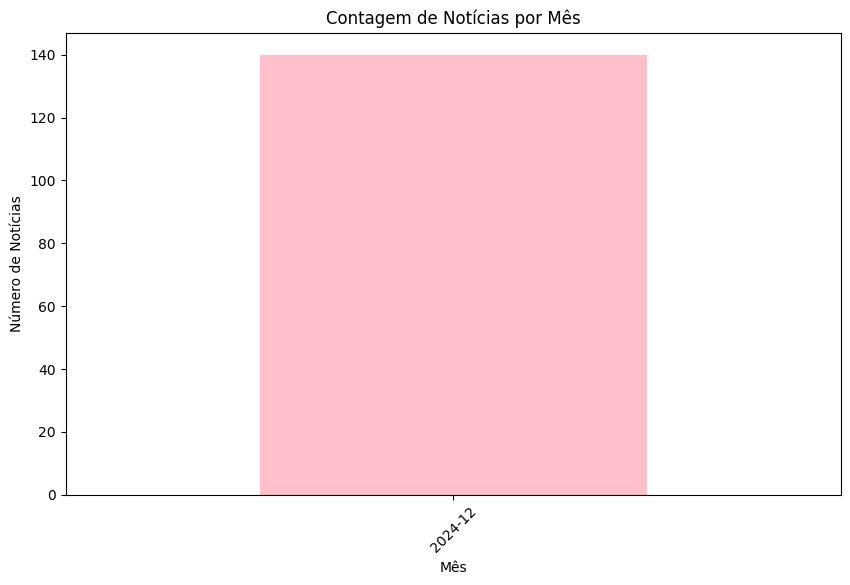

In [134]:
df = df[df['month'] != ""]  

noticiais_mes = df['month'].value_counts().sort_index()

print(noticiais_mes)

import matplotlib.pyplot as plt
noticiais_mes.plot(kind='bar', figsize=(10, 6), color='pink')
plt.title("Contagem de Notícias por Mês")
plt.xlabel("Mês")
plt.ylabel("Número de Notícias")
plt.xticks(rotation=45)
plt.show()

Como podemos observar no gráfico da contagem de notícias por mês, todas as notícias são do mês 12/2024. Para entender melhor como essas notícias foram distribuídas ao longo do mês, vamos dividi-las em intervalos de uma semana. Isso nos ajudará a identificar padrões de publicação, como possíveis picos de notícias em determinados períodos, e a compreender a frequência de publicações ao longo do mês.

week
2024-W49    39
2024-W50    74
2024-W51    27
Name: count, dtype: int64


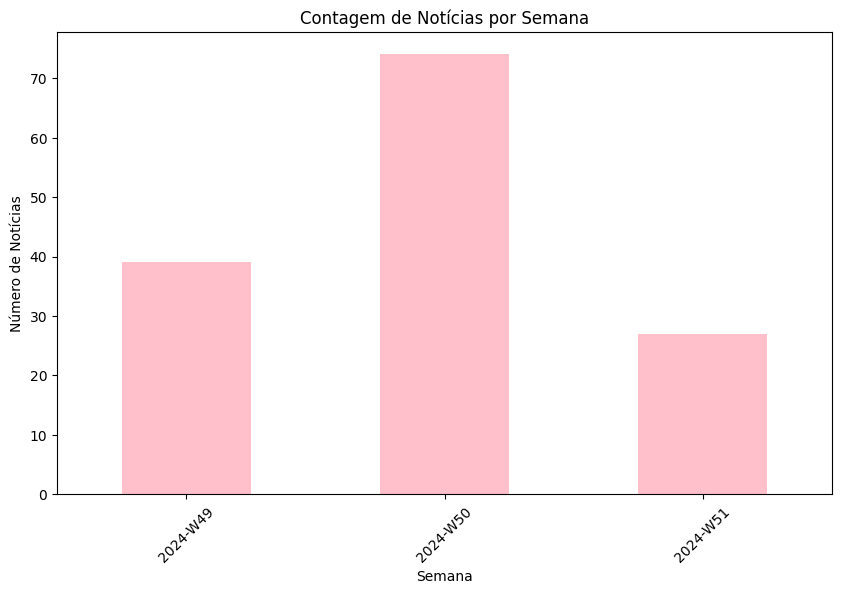

In [135]:
records = []

for json_file in data_dir.rglob("*.json"):
    with json_file.open("r", encoding="utf-8") as f:
        data = json.load(f)
        
        
        title = data.get("titulo", "")
        description = data.get("descricao", "")
        text = data.get("texto", "")
        date_str = data.get("data", "")  
        
       
        if isinstance(date_str, str) and date_str:
            try:
                date = datetime.fromisoformat(date_str) 
              
                week = date.strftime("%Y-W%U")
            except ValueError:
                week = ""
        else:
            week = ""
        
       
        records.append({
            "week": week,
            "title": title,
            "description": description,
            "text": text,
        })


df = pd.DataFrame(records)


df = df[df['week'] != ""]

noticia_semana = df['week'].value_counts().sort_index()


print(noticia_semana)

# Exibindo o gráfico de barras para distribuição de notícias por semana
import matplotlib.pyplot as plt
noticia_semana.plot(kind='bar', figsize=(10, 6), color='pink')
plt.title("Contagem de Notícias por Semana")
plt.xlabel("Semana")
plt.ylabel("Número de Notícias")
plt.xticks(rotation=45)
plt.show()


Nas últimas semanas de 2024, as notícias sobre **economia** mostraram uma variação interessante. Na 49ª semana (de 3 a 9 de dezembro), foram publicadas 39 notícias. Porém, na semana seguinte, a 50ª (de 10 a 16 de dezembro), o número saltou para 74, o que pode indicar que houve mais acontecimentos ou discussões econômicas relevantes nesse período. Já na 51ª semana (de 17 a 23 de dezembro), o número de publicações caiu para 27, provavelmente devido à proximidade das festas de fim de ano.

In [136]:
df['text_length'] = df['text'].apply(len)

agrup_semana = df.groupby('week')['text_length'].describe()

print(agrup_semana)


          count         mean          std     min     25%     50%     75%  \
week                                                                        
2024-W49   39.0  3050.820513  1219.582648  1265.0  2088.5  2739.0  4037.0   
2024-W50   74.0  3501.202703  1751.136586   729.0  2141.5  3133.0  4455.5   
2024-W51   27.0  3319.222222  1446.646343  1455.0  2288.5  2850.0  4457.0   

             max  
week              
2024-W49  5401.0  
2024-W50  8564.0  
2024-W51  6449.0  


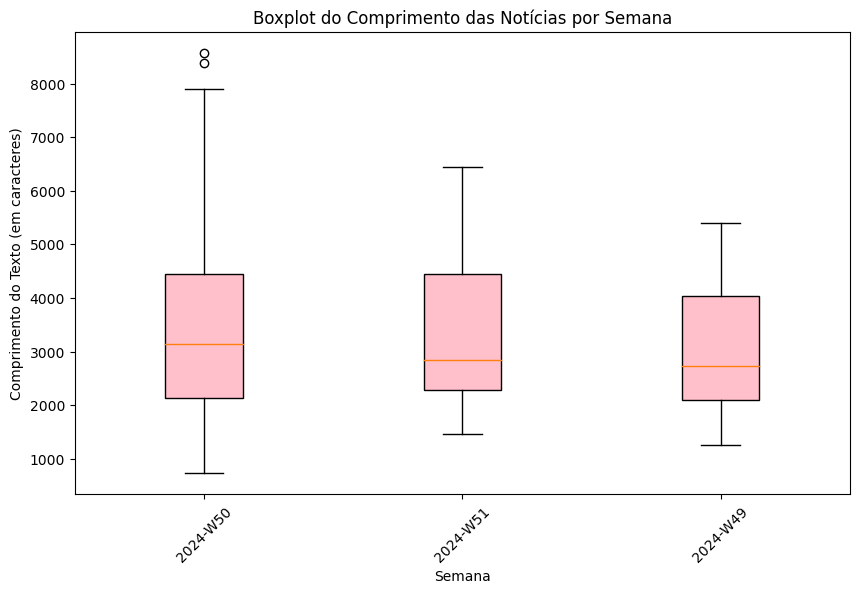

In [137]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.boxplot([df[df['week'] == week]['text_length'] for week in df['week'].unique()],
            labels=df['week'].unique(), patch_artist=True, boxprops=dict(facecolor='pink'))


plt.title("Boxplot do Comprimento das Notícias por Semana")
plt.xlabel("Semana")
plt.ylabel("Comprimento do Texto (em caracteres)")
plt.xticks(rotation=45)
plt.show()

Os **boxplots** mostram como o comprimento das notícias varia ao longo das semanas. Na semana W50, as notícias são, em média, mais longas e há uma maior diferença no tamanho delas, com algumas bem maiores que a maioria. Já nas semanas W49 e W51, o comprimento das notícias é mais parecido, com menos variação e menos notícias extremamente longas.

Com base na análise do gráfico da contagem de notícias por semana e no boxplot do comprimento das notícias, é interessante investigar os temas abordados na semana **W50**, pois ela se destaca das outras semanas, tanto pelo maior número de notícias quanto pelo comprimento mais variado das matérias. Essa diferença indica, na semana W50, houve assuntos ou eventos específicos que exigiram uma cobertura mais extensa e detalhada. 

Agora, para entender melhor os temas abordados em cada semana, vamos analisar as palavras mais frequentes nas notícias de cada uma. Com isso, poderemos identificar os termos mais recorrentes em cada período, o que nos ajudará a entender melhor os assuntos que dominaram as discussões e como eles se diferenciam ao longo das semanas. Essa análise das top palavras por semana vai nos dar uma visão mais clara sobre os focos de atenção e as tendências de conteúdo nas notícias.

Top 10 Palavras Mais Frequentes - Semana 2024-W49:
ano         127
12           77
inflação     68
alta         67
feira        66
juros        63
foi          63
bc           60
novembro     56
copom        55
dtype: int64




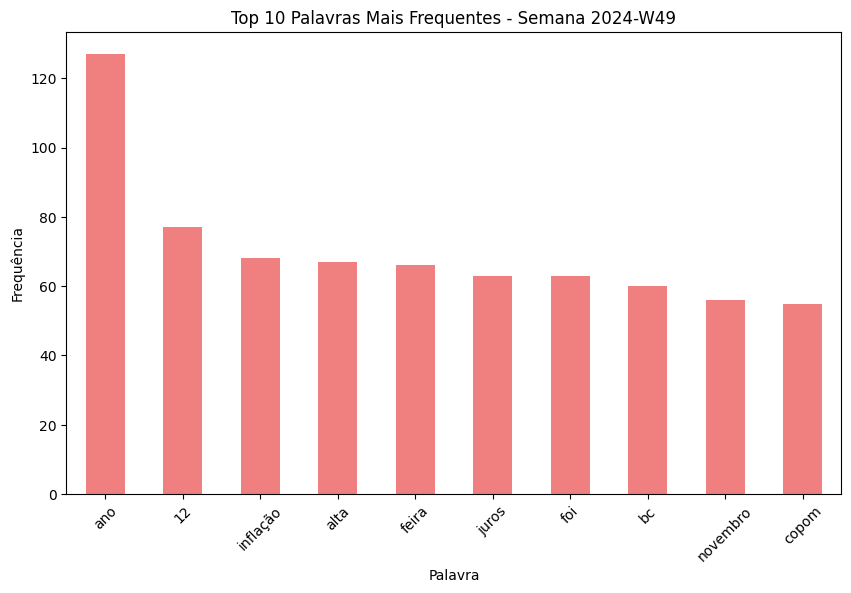

Top 10 Palavras Mais Frequentes - Semana 2024-W50:
ano        237
bilhões    139
governo    125
foi        123
feira      116
até        108
sobre      104
renda      100
segundo     98
2025        97
dtype: int64




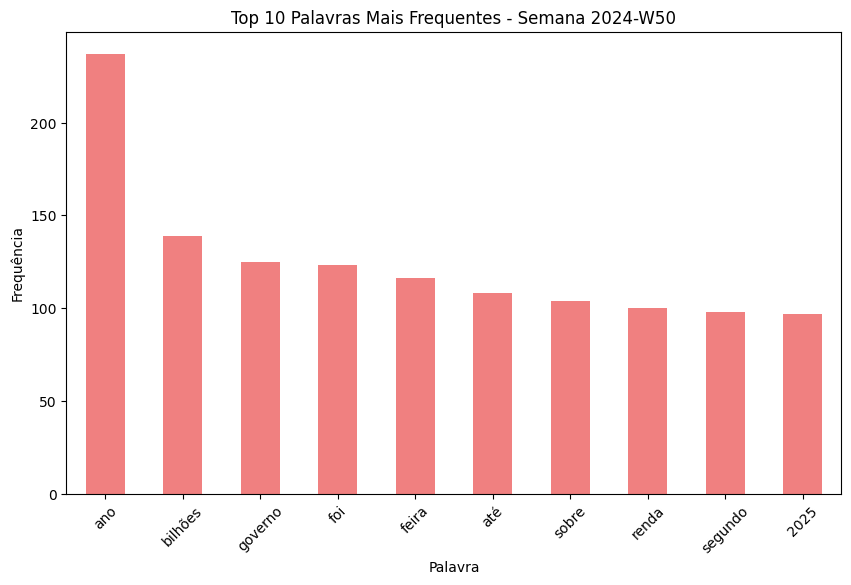

Top 10 Palavras Mais Frequentes - Semana 2024-W51:
ano         79
novembro    67
bilhões     66
mês         58
us          53
nacional    43
taxa        42
juros       40
milhões     40
12          40
dtype: int64




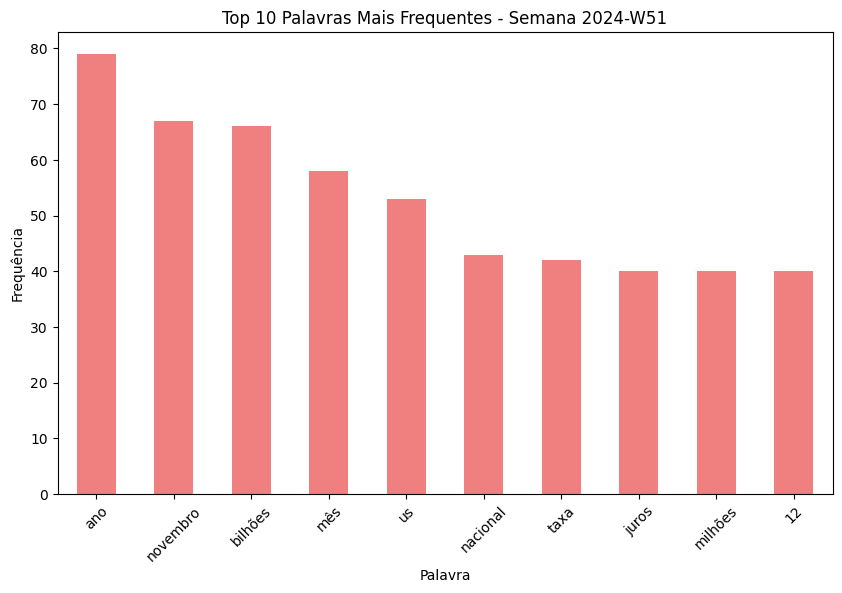

In [139]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt


def top_palavras_por_semana(df):
    for semana, grupo in df.groupby('week'):
      
        textos_grupo = grupo['text'].dropna()  
        
       
        if textos_grupo.str.len().any(): 
            vetorizar = CountVectorizer(stop_words=stop_words)
            
         
            X = vetorizar.fit_transform(textos_grupo)
            
           
            if X.shape[1] > 0:
              
                frequencia_palavras = pd.DataFrame(X.toarray(), columns=vetorizar.get_feature_names_out())
                
               
                top_n_palavras = frequencia_palavras.sum().sort_values(ascending=False).head(10)  # top 10
                
              
                print(f'Top 10 Palavras Mais Frequentes - Semana {semana}:')
                print(top_n_palavras)
                print("\n" + "="*50 + "\n")  # Separador entre as semanas
                
               
                top_n_palavras.plot(kind='bar', figsize=(10, 6), color='lightcoral', title=f'Top 10 Palavras Mais Frequentes - Semana {semana}')
                plt.xlabel('Palavra')
                plt.ylabel('Frequência')
                plt.xticks(rotation=45)
                plt.show()
            else:
                print("")


top_palavras_por_semana(df)



Os gráficos das top 10 palavras mais frequentes por semana mostram que os temas abordados nessas semanas estavam bem focados em questões econômicas. Na semana 2024-W49, as palavras mais mencionadas falam muito sobre **inflação**, **juros** e o **Banco Central**, o que mostra uma possível discussão sobre a situação econômica e as medidas para controlar a inflação. Na semana 2024-W50, o foco foi mais em temas relacionados ao **governo**, **orçamento** e **projeções para 2025**, indicando que o debate pode estar mais voltado para as  expectativas futuras em relação as políticas públicas. Por fim, na semana 2024-W51, o destaque foi para temas como **taxa**, **juros**, reforçando a continuação das discussões sobre o impacto econômico do ano.

Agora, vamos analisar a relação entre algumas das palavras-chave mais recorrentes nas semanas analisadas e o comprimento das notícias. A ideia é verificar se há alguma correlação entre o uso de termos específicos e o tamanho das notícias publicadas. Isso pode nos ajudar a entender se notícias com certos temas, como "inflação", "governo" ou "juros", tendem a ser mais longas devido à complexidade do assunto ou ao volume de informações abordadas.

Se a diferença no comprimento médio for positiva para uma semana, isso pode indicar que os tópicos discutidos exigem mais espaço para serem cobertos de forma detalhada. Por outro lado, uma diferença negativa sugeriria que as notícias sobre esses temas tendem a ser mais curtas. Essa análise pode nos ajudar a entender se, de fato, os temas mais discutidos nas semanas com maior comprimento justificam o aumento no tamanho das notícias, ou se outras variáveis estão influenciando essas variações.

In [144]:
comprimento_media_semana = df.groupby('week')['text_length'].mean()

print(comprimento_media_semana)


week
2024-W49    3050.820513
2024-W50    3501.202703
2024-W51    3319.222222
Name: text_length, dtype: float64


In [146]:
palavras_chaves_W50 = ['bilhões', 'governo', 'feira',  'renda']


df_palavras_chaves_W50 = df[df['text'].apply(lambda x: any(keyword in x for keyword in palavras_chaves_W50))]

print(f"Comprimento médio das notícias que mencionam as palavras-chave: {df_palavras_chaves_W50['text_length'].mean()}")


Comprimento médio das notícias que mencionam as palavras-chave: 3431.2076923076925


In [147]:
palavras_chave = ['ano', 'inflação', 'governo', 'bilhões', 'renda', 'feira']

df_palavras_chave = df[df['text'].apply(lambda x: any(palavra in x for palavra in palavras_chave))]
print(df_palavras_chave)

comprimento_medio_palavras_chave = df_palavras_chave['text_length'].mean()

print(f'Comprimento médio das notícias com palavras-chave: {comprimento_medio_palavras_chave}')


         week                                              title  \
0    2024-W50  Receita e B3 lançam ferramenta para calcular I...   
1    2024-W51  Dólar sobe para R$ 6,18 influenciado pelo cená...   
2    2024-W50  CMN disciplina uso de imóvel como garantia em ...   
3    2024-W50  Governo obteria superávit em 2024 sem desonera...   
4    2024-W50  Projeção de crescimento da economia sobe de 3,...   
..        ...                                                ...   
135  2024-W51  AGU pede informações a BC sobre cotação do dól...   
136  2024-W50  Governo pode enfrentar apagão em 2032, com alt...   
137  2024-W49  Auxílio Gás atrasa e só começará a ser pago ne...   
138  2024-W50  Lei Orçamentária Anual será votada após recess...   
139  2024-W49  Dólar fecha abaixo de R$ 6 pela primeira vez e...   

                                           description  \
0    Calculadora está disponível na Área do Investi...   
1    Federal Reserve (Fed, Banco Central norte-amer...   
2    Nova

In [117]:
# Calculando a diferença entre o comprimento médio das notícias por semana e as notícias com palavras-chave
diff = avg_length_all_weeks - comprimento_medio_palavras_chave

# Exibindo as diferenças
print("Diferença no comprimento médio das notícias por semana em relação às notícias com palavras-chave:")
print(diff)


Diferença no comprimento médio das notícias por semana em relação às notícias com palavras-chave:
week
           -524.158273
2024-W49    -47.055709
2024-W50     24.584970
2024-W51     -3.936051
Name: text_length, dtype: float64


Com base nos resultados, podemos observar uma relação interessante entre o comprimento das notícias e os temas abordados em cada semana. Na análise do comprimento das notícias, percebemos que, na semana 2024-W50, as notícias que mencionaram palavras-chave como "bilhões", "governo", "feira" e "renda" apresentaram um comprimento superior à média das notícias, com uma diferença de 24,58 caracteres. Isso indica que os temas daquela semana, que envolviam questões orçamentárias e sociais, como programas de distribuição de renda e análise de gastos públicos, exigiram um maior detalhamento. Esse aumento no comprimento das notícias pode estar relacionado à complexidade desses assuntos, que demandam mais explicações.

Por outro lado, nas semanas 2024-W49 e 2024-W51, as notícias que mencionaram as palavras-chave apresentaram um comprimento um pouco inferior à média. Essa diferença negativa, embora não significativa, pode indicar que as discussões daquelas semanas, relacionadas à inflação, ao Banco Central e à análise do mercado, não precisaram de tanto aprofundamento quanto os temas da semana 2024-W50.

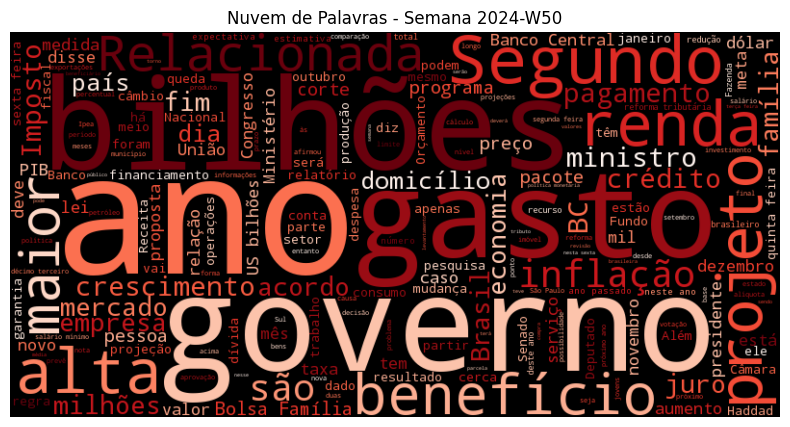

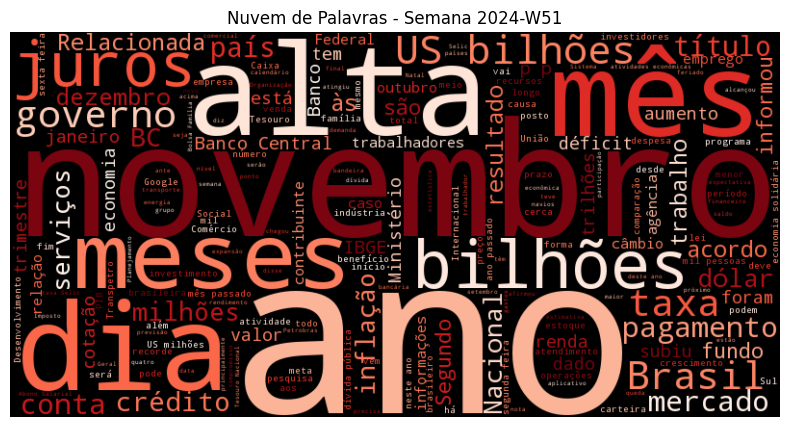

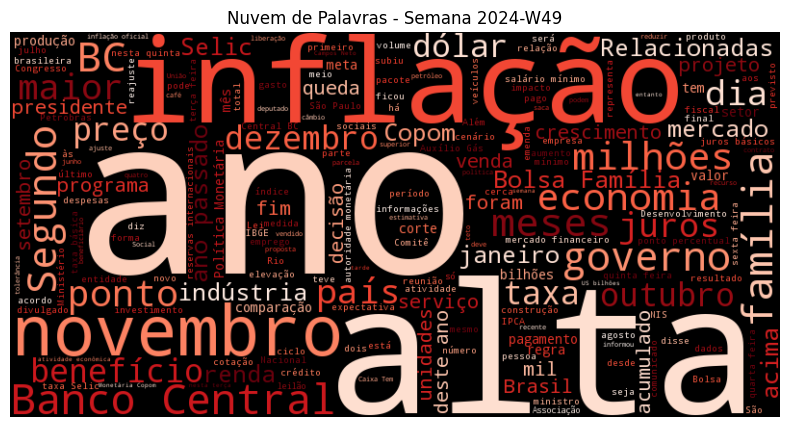

In [148]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

stopwords_completas = {
    "a","em", "foi", "pelo","ou", "não", "é", "R", "à", "o", "os", "as", "um", "uns", "uma", "umas", "de", "da", "das", "do", "dos", "na", "nas", "no", "nos", "se", "com", 
    "sem", "por", "para", "entre", "sobre", "como", "mas", "porque", "quando", "onde", "quem", "quanto", "qual", "quais", "essa", 
    "essas", "esse", "esses", "esta", "estas", "este", "estes", "uma", "umas", "algum", "alguns", "alguma", "algumas", "outro", 
    "outros", "outra", "outras", "meu", "minha", "meus", "minhas", "teu", "tua", "teus", "tuas", "seu", "sua", "seus", "suas", 
    "nosso", "nossa", "nossos", "nossas", "deles", "delas", "aquele", "aquela", "aqueles", "aquelas", "isso", "isto", "aquilo", 
    "este", "esta", "esses", "essas", "isto", "isso", "naquele", "naquela", "naqueles", "naquelas", "nós", "vós", "eles", "elas", 
    "você", "vocês", "me", "te", "lhe", "nos", "vos", "lhes", "ser", "estar", "ter", "fazer", "poder", "dizer", "ir", "ver", 
    "dar", "saber", "querer", "chegar", "precisar", "ficar", "dever", "achar", "perceber", "olhar", "escutar", "sentir", "sentir", 
    "sair", "ver", "aqui", "lá", "onde", "como", "quando", "quem", "quanto", "quanto", "mais", "menos", "isso", "aquilo", 
    "isto", "também", "muito", "pouco", "demais", "nenhum", "nenhuma", "todos", "todas", "cada", "outros", "outras", "talvez", 
    "já", "agora", "sempre", "nunca", "enquanto", "também", "ainda", "antes", "depois", "assim", "dessa", "desses", "esta", "esses",
    "o", "a", "e", "mas", "porém", "então", "porque", "logo", "da", "na", "que", "como", "onde", "se", "sem", "com", "ao", "do", 
    "dos", "das", "para", "pela", "pelos", "sobre", "entre", "durante", "até", "após", "depois", "antes", "a", "os", "ao", "na", 
    "nas", "no", "nos", "nosso", "nossa", "teu", "tua", "teus", "tuas", "meu", "minha", "meus", "minhas", "você", "vos", "vós"
}

def nuvem_palavras_semana(df, stopwords):
    semanas = df['week'].unique() 
    
    for semana in semanas:
        dados_semana = df[df['week'] == semana]
        
        todos_textos = ' '.join(dados_semana['text'].dropna())  
        
        if todos_textos:
    
            nuvem_palavras = WordCloud(stopwords=stopwords, background_color='black', width=800, height=400, colormap='Reds').generate(todos_textos)
            
            plt.figure(figsize=(10, 5))
            plt.imshow(nuvem_palavras, interpolation='bilinear')
            plt.axis('off')
            plt.title(f'Nuvem de Palavras - Semana {semana}')
            plt.show()
        else:
            print("")


nuvem_palavras_semana(df, stopwords_completas)



Ao olhar para as nuvens de palavras, fica claro que os temas de cada semana coincidem bem com o que foi discutido nas notícias. Na semana 2024-W49, por exemplo, o foco estava na inflação e nas políticas monetárias, o que se traduziu em matérias mais diretas e objetivas. Já na semana 2024-W50, com uma abordagem mais aprofundada sobre orçamento e programas sociais, o aumento no comprimento das notícias fez total sentido, como vimos na análise. Na semana 2024-W51, os temas de economia de fim de ano e o mercado continuaram sendo discutidos, mas de forma mais concisa, o que explica o comprimento das matérias, que foi mais curto.

Portanto, as nuvens de palavras e a análise do comprimento das notícias mostram que, embora não seja possível afirmar com certeza que há uma causalidade entre os temas e o tamanho das matérias, é possível perceber uma correlação: quanto mais complexos e detalhados os temas, mais longas as notícias tendem a ser, como vimos na semana 2024-W50.